<a href="https://colab.research.google.com/github/USAFADFCS/cs471-pex-5-fall-2021-waz-and-garth/blob/main/PEX_5_Student_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Partner 1 Name: Devin Wasilefsky
### Parnter 2 Name: Garth Knutson
### Documentation Statement

#PEX 5 YOLO!
## 80 Points

In PEX 5 you will train the YOLO object detection algorihtm to detect objects that interest you. If you are not feeling creative, you can collect data and train a model to detect playing card suits and face values. You will then do something interesting with your model. For example, with the playing card data set, you can use the web cam to play blackjack without user input. 

The graded objectives for PEX 5 are:

(10 pts) Collect and label data for use in building a custom YOLO model

(20 pts) Train the YOLO model to high accuracy for your domain

  **"Lt Col Maher, what is high accuracy?" ... It depends on your domain. If you want to make sure you recieve full credit, write down all of your efforts to improve the accuracy of the model, and write a statement why you think you have achieved peak accuracy in this model. Charts and graphs will help to justify your stance. 

(10 pts) Use data analysis to interpret the Mean Average Precision, accuracy and recall of your model

(20 pts) Enable object detection through a web camera

(20 pts) Write code that does something interesting with your model. 

(10 pts) Write a 300-500 word essay describing the possible ethical implications of your project. Reference an ethical framework to justify your view. 


**AUTHORIZED RESOURCES:** Any material from the CS 471 course site and online resources. You may reuse online code as long as you describe what the code is doing in your comments and you modify it to solve this problem. Don't forget to document any online code sources. 

**NOTE:**

*  Never copy another person’s or group’s work and submit it as your own.
*  Do not jointly create a program or complete this assignment unless explicitly allowed.
*   You must document all help received from sources other than your instructor or instructor-provided course materials (including your textbook).

**Documentation Policy:**

*   You must document all help received from any source other than your instructor or instructor-provided materials, including your textbook (unless directly quoting or paraphrasing).
*   The documentation statement must explicitly describe WHAT assistance was provided, WHERE on the assignment the assistance was provided, and WHO provided the assistance, and HOW it was used in completing the assignment.
*   If no help was received on this assignment, the documentation statement must state “None.”
*   If you checked answers with anyone, you must document with whom on which problems. You must document whether or not you made any changes, and if you did make changes you must document the problems you changed and the reasons why.
*   Vague documentation statements must be corrected before the assignment will be graded and will result in a 5% deduction on the assignment.

**Turn-in Policies:**

*   On-time turn-in is at the specific day and time listed above.
*   Post the required solution files to your Github Classroom repo.
*   Only 1 turn-in required per team.






## (10 pts) Task 1 Train and Label data for use in building a custom YOLO model. 
I recommend creating an account with Roboflow.com to upload pictures and label the data set. There are several other tools available that you are welcome to use. If you use another tool, I will need a way to access your data; please provide that method in the text box below. If you use Roboflow, copy and paste the link to your Roboflow project page below.

https://app.roboflow.com/devin-wasilefsky/ai-playing-cards/30

### Answer to Task 1

## (20 pts) Task 2 Train a Yolo model to high accuracy. 

Keep a log of your experimentation with improving your model. 

In [1]:
##Answer to Task 2. Paste your code here. You may use code from the internet and in-class exercises 
# clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
!git reset --hard 886f1c03d839575afecb059accf74296fad395b6

Cloning into 'yolov5'...
remote: Enumerating objects: 10152, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 10152 (delta 0), reused 0 (delta 0), pack-reused 10148
Receiving objects: 100% (10152/10152), 10.45 MiB | 28.78 MiB/s, done.
Resolving deltas: 100% (7032/7032), done.
/content/yolov5
HEAD is now at 886f1c0 DDP after autoanchor reorder (#2421)


In [2]:
# install dependencies as necessary
!pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch

from IPython.display import Image, clear_output  # to display images
from utils.google_utils import gdrive_download  # to download models/datasets

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

     |████████████████████████████████| 596 kB 7.9 MB/s 
Setup complete. Using torch 1.10.0+cu111 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


In [3]:
#follow the link below to get your download code from from Roboflow
!pip install -q roboflow
from roboflow import Roboflow
rf = Roboflow(model_format="yolov5", notebook="roboflow-yolov5")

     |████████████████████████████████| 145 kB 7.9 MB/s 
     |████████████████████████████████| 178 kB 49.2 MB/s 
     |████████████████████████████████| 1.1 MB 29.0 MB/s 
     |████████████████████████████████| 67 kB 6.2 MB/s 
     |████████████████████████████████| 138 kB 45.5 MB/s 
     |████████████████████████████████| 62 kB 738 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=yolov5&ref=roboflow-yolov5


In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="SOIoAeVHOJNdIeEQlHRD")
project = rf.workspace().project("ai-playing-cards")
dataset = project.version(30).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to AI-Playing-Cards-30 in yolov5pytorch:: 100%|██████████| 603/603 [00:00<00:00, 5141.46it/s]


In [5]:
%cat /content/yolov5/data.yaml
#dataset.location = '/content/yolov5'
# define number of classes based on YAML
import yaml
with open(dataset.location + "/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])
#this is the model configuration we will use for our tutorial 
%cat /content/yolov5/models/yolov5s.yaml
#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

cat: /content/yolov5/data.yaml: No such file or directory
# parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, C3, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   

In [6]:
%%writetemplate /content/yolov5/models/custom_yolov5s.yaml

# parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

#To get our best weights, download the file labeled "final.pt" from our git repository at https://github.com/USAFADFCS/cs471-pex-5-fall-2021-waz-and-garth
#Upload to your google session and then add --weights /content/final.pt and it should run

In [7]:
#Answer to Task 3. Place any code you use in this box
%cd /content/yolov5/
!python train.py --img 416 --batch 16 --epochs 1 --data {dataset.location}/data.yaml --cfg ./models/custom_yolov5s.yaml --weights /content/final.pt --name yolov5s_results  --cache --exist-ok

/content/yolov5
github: ⚠️ WARNING: code is out of date by 713 commits. Use 'git pull' to update or 'git clone https://github.com/ultralytics/yolov5' to download latest.
YOLOv5 v4.0-126-g886f1c0 torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16280.875MB)

Namespace(adam=False, batch_size=16, bucket='', cache_images=True, cfg='./models/custom_yolov5s.yaml', data='/content/yolov5/AI-Playing-Cards-30/data.yaml', device='', entity=None, epochs=1, evolve=False, exist_ok=True, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[416, 416], linear_lr=False, local_rank=-1, log_artifacts=False, log_imgs=16, multi_scale=False, name='yolov5s_results', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/yolov5s_results', single_cls=False, sync_bn=False, total_batch_size=16, weights='/content/final.pt', workers=8, world_size=1)
wandb: Install Weights & Biases for YOLOv5 logging with 'pip install wa

#Our accuracy for a mAP@.5 is .995 and our accuracy for mAP@.5:.95 is .823

## (20 pts) Task 3 Justify how well your model performs
Provide charts showing at least the Mean Average Precision, Accuracy, and Recall of your model. Discuss the charts and what these results mean. You may want to include a discussion on overfitting and underfitting in your discussion. 

In [ ]:
!python detect.py --help

usage: detect.py [-h] [--weights WEIGHTS [WEIGHTS ...]] [--source SOURCE]
                 [--img-size IMG_SIZE] [--conf-thres CONF_THRES]
                 [--iou-thres IOU_THRES] [--device DEVICE] [--view-img]
                 [--save-txt] [--save-conf] [--classes CLASSES [CLASSES ...]]
                 [--agnostic-nms] [--augment] [--update] [--project PROJECT]
                 [--name NAME] [--exist-ok]

optional arguments:
  -h, --help            show this help message and exit
  --weights WEIGHTS [WEIGHTS ...]
                        model.pt path(s)
  --source SOURCE       source
  --img-size IMG_SIZE   inference size (pixels)
  --conf-thres CONF_THRES
                        object confidence threshold
  --iou-thres IOU_THRES
                        IOU threshold for NMS
  --device DEVICE       cuda device, i.e. 0 or 0,1,2,3 or cpu
  --view-img            display results
  --save-txt            save results to *.txt
  --save-conf           save confidences in --save-txt labels
 

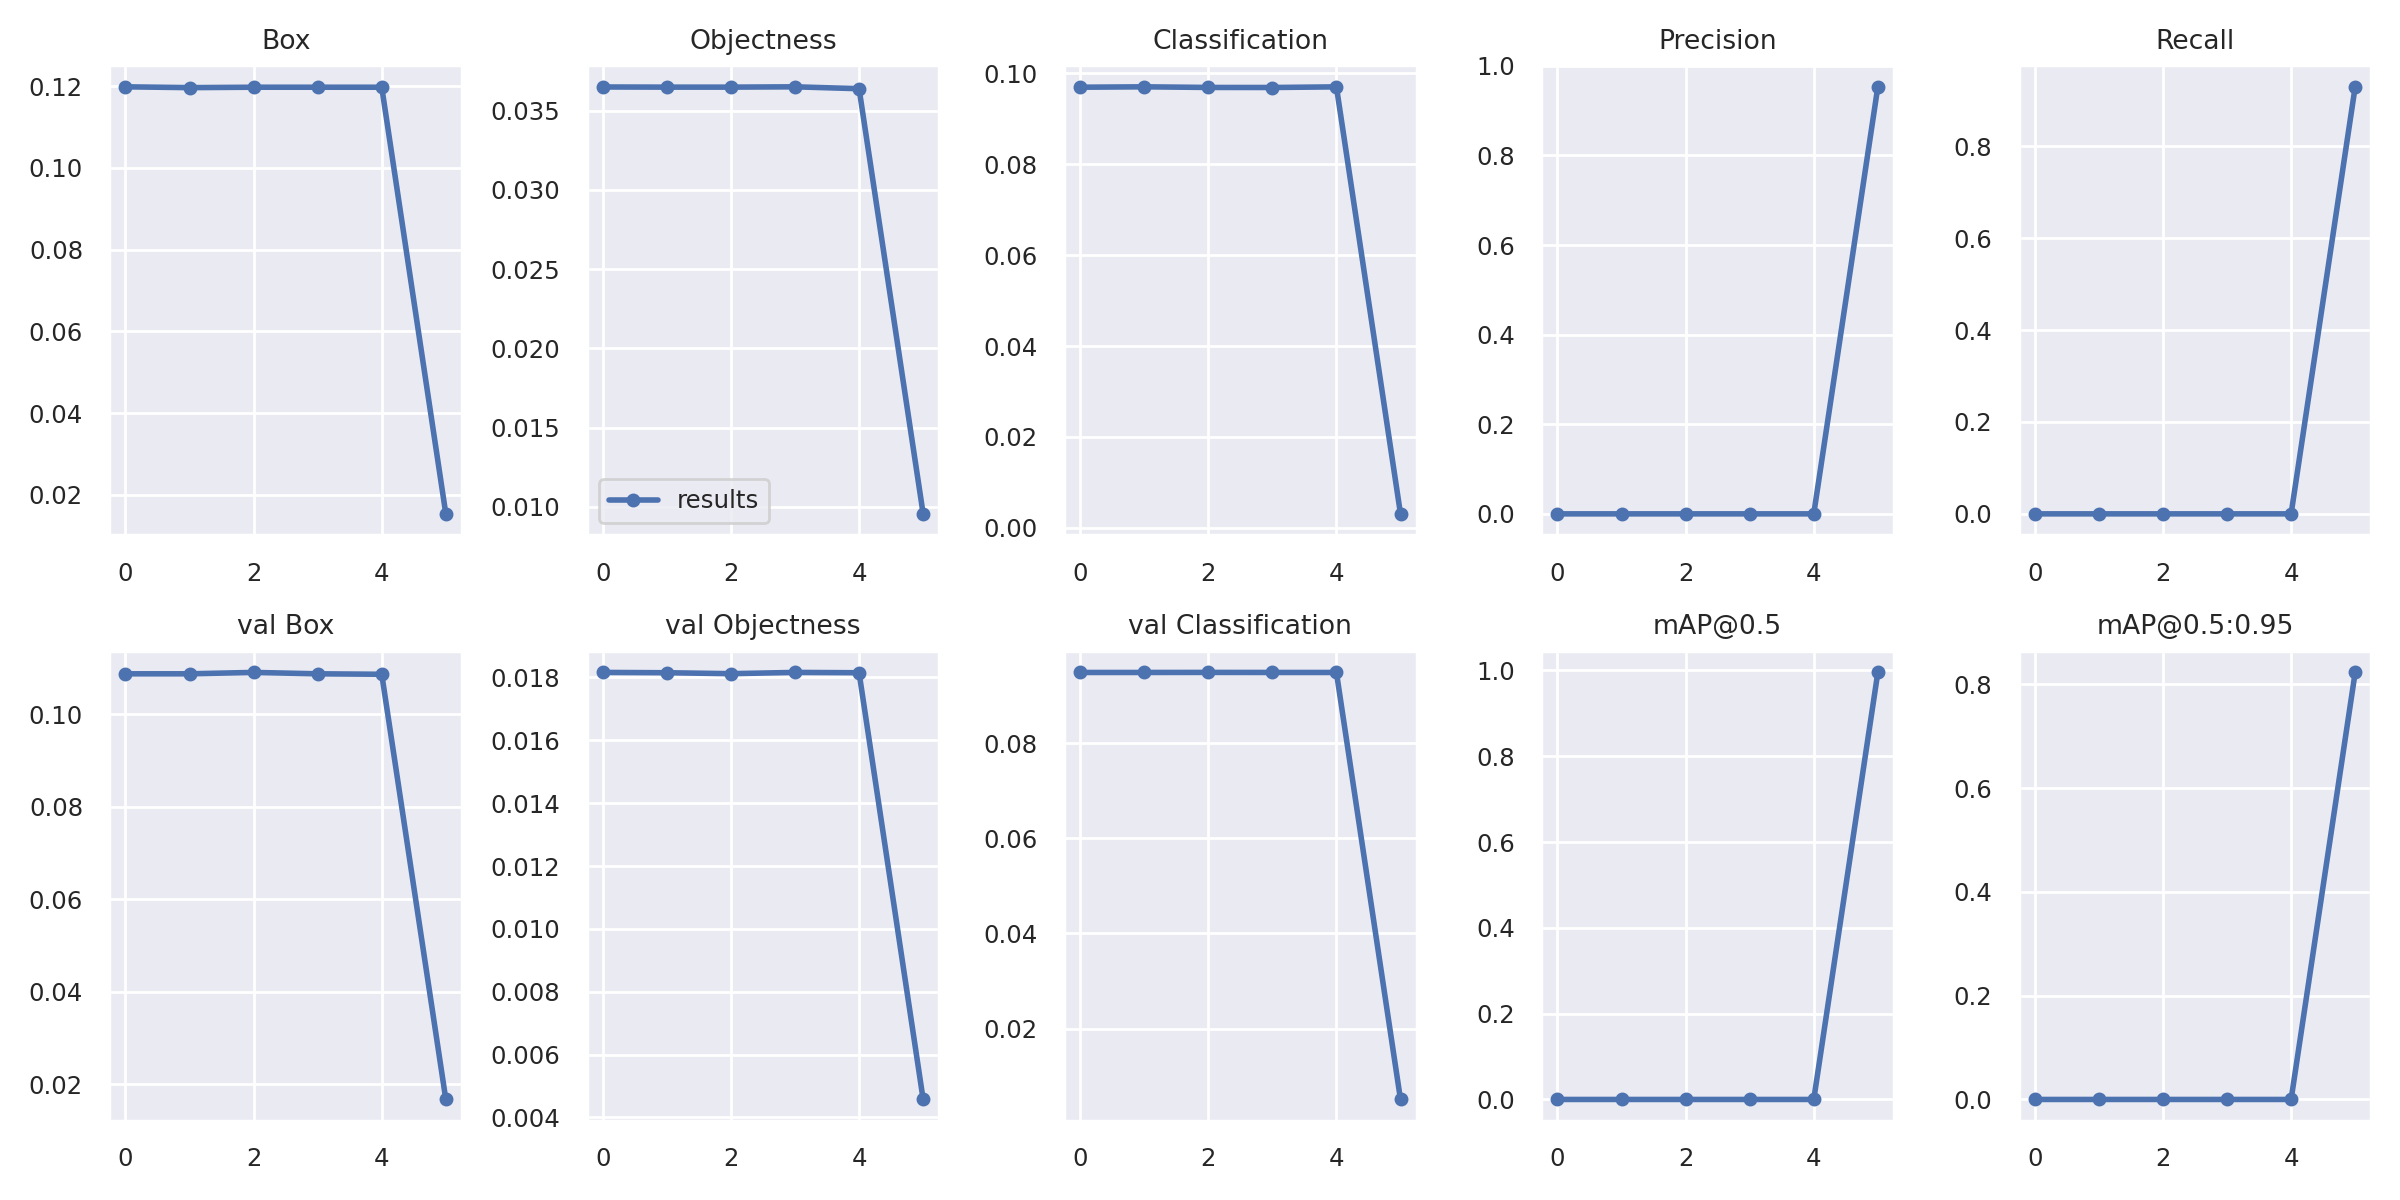

In [ ]:
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/yolov5/runs/train/yolov5s_results/results.png', width=1000)  # view results.png

###Answer to Task 3. 
Add any discussion of your models to this box. 

##(20 pts) Task 4. Connect your model to Webcam streaming

Enable your model to predict in real-time on a web camera, using your custom model. If the objects you train your model to are not something commonly available, please provide the web cam code and a pre-recorded video of you detecting the object. 

Hint: On the left hand side, Google Colab gives you code for accessing your webcam with Javascript. Use this code to get your webcam working. YOLO has a webcam input functionality built-in, but you cannot use this functionality, because it is attempting to open the webcam on Google's server and not your laptop. To execute this step

1.   Modify the webcam code so that it will open the webcam,
2.   take a picture,
1.   close the webcam,
2.   run the detection algorithm,
1.   display the detection image
2.   and then repeat 5 times.

This will not be the same as real-time webcam footage, but it will get you as close as you can get on Google Colab. 


In [ ]:
##Answer to Task 4. Paste your code here. You may use code from the internet and in-class exercises 

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo5.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo5.jpg


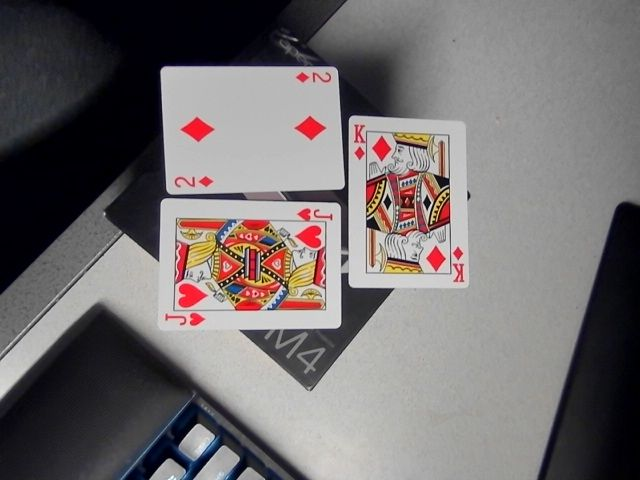

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

##(10 pts) Task 5. Create something interesting using your model

You have a limited time, so don't make this a huge feature, just something cool your model could do. For example, something that counts the objects coming across the webcam would receive full points. If you have a more creative idea, I may be inclined to add some bonus points, but make sure you are taking care of your other classwork as well. 

We can add up all of the numbers or something

In [58]:
!python detect.py --weights /content/final.pt --img 416 --conf 0.2 --source /content/Detect.py\ Pictures/photo5.jpg

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.2, device='', exist_ok=False, img_size=416, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='/content/Detect.py Pictures/photo5.jpg', update=False, view_img=False, weights=['/content/final.pt'])
YOLOv5 v4.0-126-g886f1c0 torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16280.875MB)

Fusing layers... 
/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 232 layers, 7384065 parameters, 0 gradients, 17.2 GFLOPS
Traceback (most recent call last):
  File "detect.py", line 175, in <module>
    detect()
  File "detect.py", line 53, in detect
    dataset = LoadImages(source, img_size=imgsz, stride=stride)
  File 

In [59]:
!python detect.py --save-txt --save-conf --weights /content/final.pt --img 416 --conf 0.2 --source /content/photo1.jpg

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.2, device='', exist_ok=False, img_size=416, iou_thres=0.45, name='exp', project='runs/detect', save_conf=True, save_txt=True, source='/content/photo1.jpg', update=False, view_img=False, weights=['/content/final.pt'])
YOLOv5 v4.0-126-g886f1c0 torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16280.875MB)

Fusing layers... 
/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 232 layers, 7384065 parameters, 0 gradients, 17.2 GFLOPS
image 1/1 /content/photo1.jpg: 320x416 2 3Cs, 2 JDs, 2 QCs, Done. (0.015s)
Results saved to runs/detect/exp5
1 labels saved to runs/detect/exp5/labels
Done. (0.034s)


In [111]:
file = open("/content/yolov5/runs/detect/exp/labels/photo1.txt", 'r')
contents = file.readlines()
check = []
final = []
print(range(len(contents)))
for i in range(len(contents)): # how many lines (6)
  if contents[i][1] == ' ':
    temp = contents[i][0]
    temp = int(temp)
    check.append(temp)
  else:
    temp = contents[i][0] + contents[i][1]
    temp = int(temp)
    check.append(temp)
cards = ["10C", "10D", "10H", "10S", "2C", "2D", "2H", "2S", "3C", 
         "3D", "3H", "3S", "4C", "4D", "4H", "4S", "5C", "5D", "5H", 
         "5S", "6C", "6D", "6H", "6S", "7C", "7D", "7H", "7S", "8C", 
         "8D", "8H", "8S", "9C", "9D", "9H", "9S", "AC", "AD", "AH", 
         "AS", "JC", "JD", "JH", "JS", "KC", "KD", "KH", "KS", "QC", 
         "QD", "QH", "QS"]
for i in range(len(check)):
  if cards[check[i]] not in final:
    final.append(cards[check[i]])


for i in range(len(final)):
  print(final[i])




# /content/runs/detect/exp/labels/photo1.txt

range(0, 6)
3C
JD
QC


### (10 pts) Task 6. Write 300-500 words on the ethical implications of your project.
Make sure you support your thoughts with ethical frameworks from ACM, IEEE, or any other reputible source. 

##Answer to Task 6